# **Analyse sur le nombre de personnes ayant attendu en espace de vente de grandes gares SNCF en 2019-2021**

***
**Table des matières :**
* [1. La tendance au niveau du nombre de personnes ayant attentu plus de 30 minutes](#1)
* [2. La tendance au niveau du nombre de personnes ayant attentu plus de 60 minutes](#2)
* [3. La répartition du nombre de personnes ayant attendu en espace de vente dans chaque grande gare](#3)
***

**Étudiant :**
- Zhifeng LIANG

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install pyspark
!sudo apt-get install language-pack-fr

     |████████████████████████████████| 212.3MB 61kB/s 
     |████████████████████████████████| 204kB 19.6MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.1-py2.py3-none-any.whl size=212767604 sha256=769ea298567566e944665f081cba515f82fa5241a5548df42bbcf8dc15779511
  Stored in directory: /root/.cache/pip/wheels/0b/90/c0/01de724414ef122bd05f056541fb6a0ecf47c7ca655f8b3c0f
Successfully built pyspark
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  language-pack-fr-base
The following NEW packages will be installed:
  language-pack-fr language-pack-fr-base
0 upgraded, 2 newly installed, 0 to remove and 29 not upgraded.
Need to get 4,788 kB of archives.
After this operation, 21.4 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 language-pack-fr-base all 1:18.04+20180712 [2,875 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-up

In [ ]:
import calendar
import locale
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pyspark.sql import SparkSession

In [ ]:
# !locale -a

In [ ]:
# locale.setlocale(locale.LC_ALL, 'fr_FR.UTF-8')

In [ ]:
# create SparkSession
spark = SparkSession.builder.master("local[*]") \
                    .appName('SparkSNCF') \
                    .getOrCreate()

# extract SparkContext
sc = spark.sparkContext

print('Spark is ready with CPU usage :', sc.defaultParallelism)

Spark is ready with CPU usage : 2


In [ ]:
df_spark_sql = spark.read.option("delimiter", ";").option("header",True).csv("/content/drive/MyDrive/Cours_HETIC/Architecure_Programmation/data/attente-au-guichet.csv")

In [ ]:
df_spark_sql.show(2)
df_spark_sql.printSchema()

+--------------------+----------+----------+-------------------------+-------------------------+-------+
|                Gare|  Code UIC|      Date|Nbr Temps Attente > 30min|Nbr Temps Attente > 60min|Arrivés|
+--------------------+----------+----------+-------------------------+-------------------------+-------+
|Gare de Bordeaux ...|87581009.0|2019-01-07|                      0.0|                      0.0|  826.0|
|Gare de Bordeaux ...|87581009.0|2019-01-10|                     56.0|                      0.0|  672.0|
+--------------------+----------+----------+-------------------------+-------------------------+-------+
only showing top 2 rows

root
 |-- Gare: string (nullable = true)
 |-- Code UIC: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Nbr Temps Attente > 30min: string (nullable = true)
 |-- Nbr Temps Attente > 60min: string (nullable = true)
 |-- Arrivés: string (nullable = true)



In [ ]:
df_spark_sql.createOrReplaceTempView("Sncf_waiting")

<a id='1'></a>
## **1. La tendance au niveau du nombre de personnes ayant attentu plus de 30 minutes**

In [ ]:
df_spark_sql_dates_30 = spark.sql("SELECT to_date(Date, 'yyyy-MM-dd') AS Date, SUM(INT(`Nbr Temps Attente > 30min`)) AS Total_30 FROM Sncf_waiting GROUP BY Date ORDER BY Date")

In [ ]:
dates_30 = [(x.Date, x.Total_30) for x in df_spark_sql_dates_30.collect()]

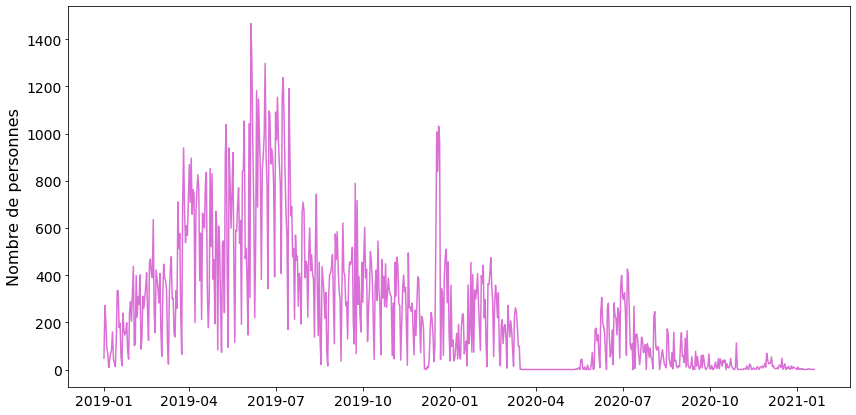

In [ ]:
plt.figure(figsize=(14,7))
plt.plot([x for x, y in dates_30], [y for x, y in dates_30], color='orchid')
# ax = plt.gca()
# ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
# plt.gcf().autofmt_xdate() # Rotation
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Nombre de personnes', fontsize=16)
plt.show()

<a id='2'></a>
## **2. La tendance au niveau du nombre de personnes ayant attentu plus de 60 minutes**

In [ ]:
df_spark_sql_dates_60 = spark.sql("SELECT to_date(Date, 'yyyy-MM-dd') AS Date, SUM(INT(`Nbr Temps Attente > 60min`)) AS Total_60 FROM Sncf_waiting GROUP BY Date ORDER BY Date")

In [ ]:
dates_60 = [(x.Date, x.Total_60) for x in df_spark_sql_dates_60.collect()]

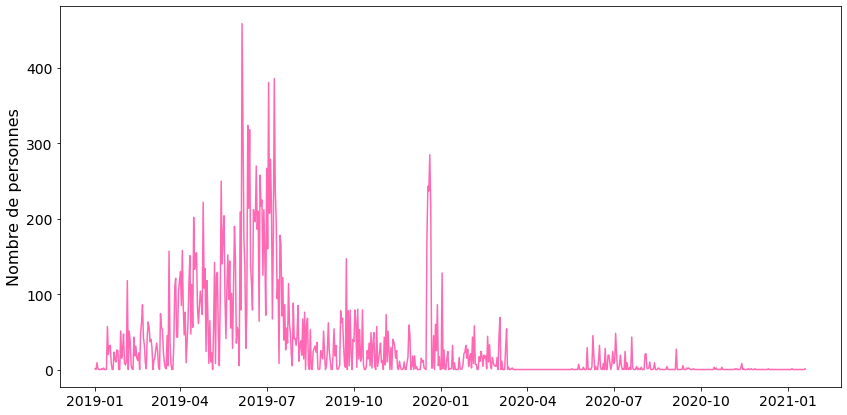

In [ ]:
plt.figure(figsize=(14,7))
plt.plot([x for x, y in dates_60], [y for x, y in dates_60], color='hotpink')
# ax = plt.gca()
# ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
# plt.gcf().autofmt_xdate() # Rotation
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Nombre de personnes', fontsize=16)
plt.show()

<a id='3'></a>
## **3. La répartition du nombre de personnes ayant attendu en espace de vente dans chaque grande gare**

In [ ]:
df_spark_sql_gares_30 = spark.sql("SELECT Gare, SUM(INT(`Nbr Temps Attente > 30min`)) AS Total_30 FROM Sncf_waiting GROUP BY Gare ORDER BY Gare")

In [ ]:
df_spark_sql_gares_60 = spark.sql("SELECT Gare, SUM(INT(`Nbr Temps Attente > 60min`)) AS Total_60 FROM Sncf_waiting GROUP BY Gare ORDER BY Gare")

In [ ]:
gares_30 = [(x.Gare, x.Total_30) for x in df_spark_sql_gares_30.collect()]
gares_60 = [(x.Gare, x.Total_60) for x in df_spark_sql_gares_60.collect()]

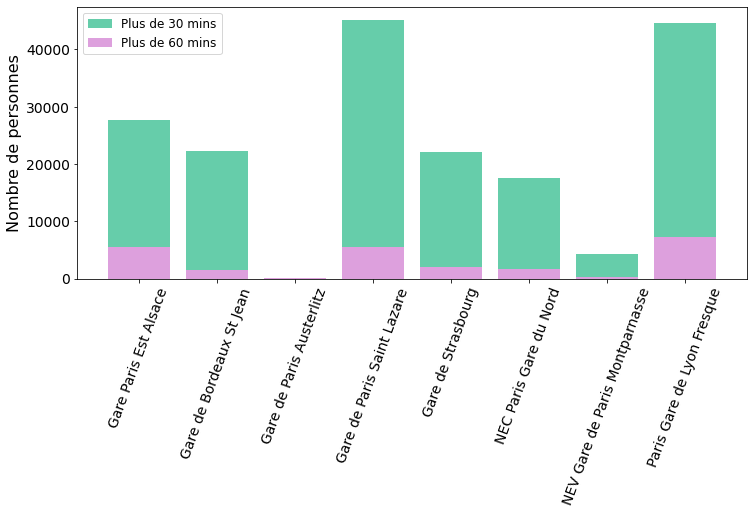

In [ ]:
plt.figure(figsize=(12,5))
plt.bar(range(len(gares_30)), [y for x, y in gares_30], color='mediumaquamarine')
plt.bar(range(len(gares_60)), [y for x, y in gares_60], color='plum')
plt.xticks(range(len(gares_30)), [val[0] for val in gares_30], rotation = 70, fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Nombre de personnes', fontsize=16)
plt.legend(['Plus de 30 mins', 'Plus de 60 mins'], fontsize=12)
plt.show()